In [1]:
import pandas

import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

rc('text', usetex=True)
plt.style.use('seaborn-notebook')

plt.rcParams['axes.titlesize'] = '25'
plt.rcParams['axes.labelsize'] = '25'
plt.rcParams['xtick.labelsize'] = '14'
plt.rcParams['ytick.labelsize'] = '14'

%matplotlib notebook

In [5]:
# Replace this variable accordingly 
path_to_results = "../experiments/2018-09-28-01-55_PowerDiscrete_/"

In [6]:
data = pandas.read_csv(path_to_results + "PowerDiscrete.csv", header=0)
data["category"] = [x.split("-")[0] for x in data["refId"]]

In [7]:
data["nDim"].unique()

array([3])

In [8]:
data['d'].unique()

array([100,  50,  10,   5,   3,   1])

In [9]:
data["testId"].unique()

array(['MS', 'MWP', 'CMI', 'HiCS', 'UDS', 'MAC'], dtype=object)

In [10]:
data["category"].unique()

array(['0', 'Linear', 'Hourglass', 'HyperSphere', 'Independent', 'Cross',
       'Sine_1', 'Sine_5', 'Star', 'Zinv', 'Parabolic_1', 'HypercubeGraph',
       'DoubleLinear_0.25', 'Hypercube'], dtype=object)

In [11]:
selectedCategories = ["Cross", 'DoubleLinear_0.25', 'Hourglass', 'Hypercube', 'HypercubeGraph', 'HyperSphere',
                     'Linear', 'Parabolic_1', 'Sine_1', 'Sine_5', 'Star', 'Independent', "Zinv"]

In [12]:
selecteCategoriesDict = {
    'Linear' : "L",
    'Sine_1' : "S1", 
    'Sine_5' : "S5", 
    'Hypercube' : "Hc", 
    'DoubleLinear_0.25': "Dl", 
    "Cross": "C",
    'Hourglass' : "H", 
    'HyperSphere' : "Hs",
    'Parabolic_1' : "P", 
    'Star' : "St",
    'Zinv' : "Zi", 
    "Independent" : "I",
    'HypercubeGraph' : "HcG", 
}

In [13]:
selectedData = data

In [14]:
data["testId"].unique()

array(['MS', 'MWP', 'CMI', 'HiCS', 'UDS', 'MAC'], dtype=object)

In [15]:
# Note: We have excluded II and TC as they are anyway NOT robust
selectedTests = data['testId'].unique()

In [16]:
selectedData = data[[str(x) in selectedCategories for x in data["category"]]]
selectedData["category"] = [selecteCategoriesDict[x] for x in selectedData["category"]]
selectedData = selectedData[[str(x) in selectedTests for x in selectedData["testId"]]]

/home/fouchee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [17]:
selectedData = selectedData.sort_values(["testId","d"])

In [18]:
selectedData["category"].unique()

array(['L', 'P', 'I', 'S1', 'Hs', 'S5', 'H', 'St', 'C', 'Hc', 'Zi', 'Dl',
       'HcG'], dtype=object)

## Fig 9: Power and average score of each approach w.r.t. .\omega

### Power

<IPython.core.display.Javascript object>


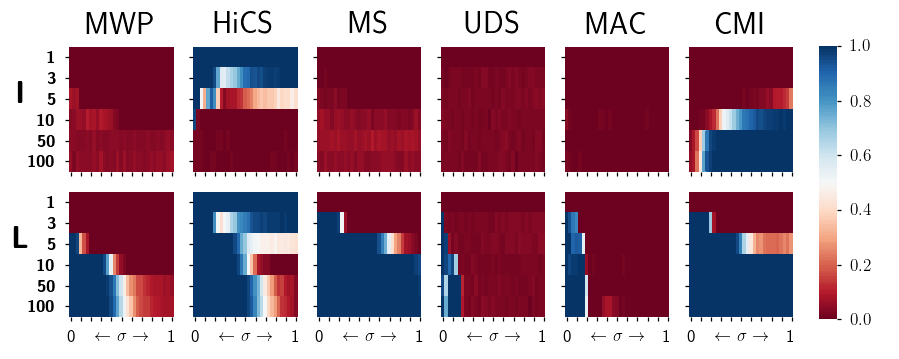

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [20]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, 
                         ncols=len([x for x in selectedData['testId'].unique() if "MWPr" not in x]),
                         figsize=(10,4), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.11, .02, 0.76])

measure = "powerAt95"
nDim = 3

tests = ["MWP", "HiCS", "MS", "UDS", "MAC", "CMI"]
for i,x in enumerate(["I", "L"]):
    for j,y in enumerate(tests):
        subdata = selectedData[(selectedData["category"] == x) & 
                               (selectedData["testId"] == y) & 
                               (selectedData["nDim"] == nDim) &
                               selectedData["d"].isin([1,3,5,10,50,100]) ]
        d = subdata.groupby(["noise","d"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "d"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        ax = axes[i][j]

        sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=i == 0, cbar_ax=None if i else cbar_ax,
                   vmin=0, vmax=1)

        ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
        ax.set_title(r'%s - %s'%(x, y), y=1.04)
        ax.set_ylabel("")
        sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
        labels = ["0"] + sp + [""] + sp + [""] + sp + [""] + sp + [""] + sp + ["1"]
        labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
        ax.set_xticklabels(labels)
        
        
        if(j == 0):
            ax.set_ylabel(r'\textbf{%s}'%x, rotation=0, x=0.80)
        else:
            ax.set_ylabel("")
            
        if(i == 1):
            ax.set_xlabel(r'')
        else:
            ax.set_xlabel("")
            
        if(i == 0):
            ax.set_title(r'%s'%(y))
        else:
            ax.set_title("")


plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig9_1.pdf")

### Average Score

<IPython.core.display.Javascript object>


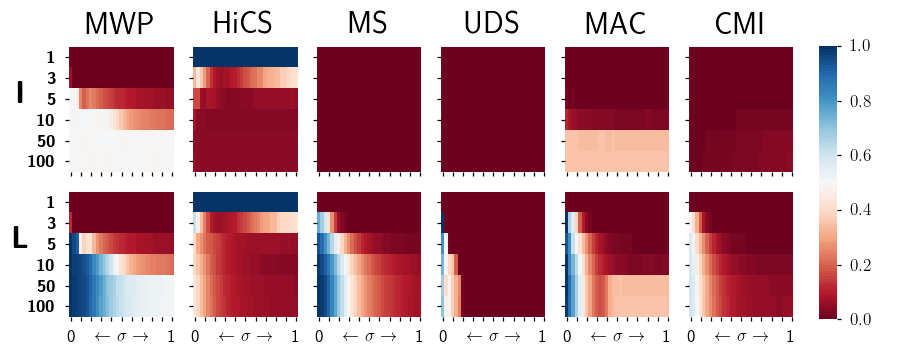

/home/fouchee/anaconda3/lib/python3.6/site-packages/matplotlib/figure.py:1743: UserWarning: This figure includes Axes that are not compatible with tight_layout, so its results might be incorrect.
  warnings.warn("This figure includes Axes that are not "


In [21]:
%matplotlib notebook

fig, axes = plt.subplots(nrows=2, 
                         ncols=len([x for x in selectedData['testId'].unique() if "MWPr" not in x]),
                         figsize=(10,4), sharey=True, sharex=True)
axess = axes.reshape(-1)
cbar_ax = fig.add_axes([.91, 0.11, .02, 0.76])

measure = "avgContrast"
nDim = 3

tests = ["MWP", "HiCS", "MS", "UDS", "MAC", "CMI"]
for i,x in enumerate(["I", "L"]):
    for j,y in enumerate(tests):
        subdata = selectedData[(selectedData["category"] == x) & 
                               (selectedData["testId"] == y) & 
                               (selectedData["nDim"] == nDim) &
                               selectedData["d"].isin([1,3,5,10,50,100])  ]
        d = subdata.groupby(["noise","d"]).mean()[measure].reset_index()
        dd = d.set_index(["noise", "d"]).unstack("noise")
        dd.columns = dd.columns.droplevel(0)

        ax = axes[i][j]

        sns.heatmap(dd, cmap=sns.color_palette("RdBu", 100), ax = ax, 
                        xticklabels=3,
                        cbar=i == 0, cbar_ax=None if i else cbar_ax,
                   vmin=0, vmax=1)

        ax.set_yticklabels([r'\textbf{%s}'%x.get_text() for x in ax.get_yticklabels()], rotation=0)
        ax.set_title(r'%s - %s'%(x, y), y=1.04)
        ax.set_ylabel("")
        sp = [""]*int(((len(ax.get_xticklabels())-6)/5))
        labels = ["0"] + sp + [""] + sp + [""] + sp + [""] + sp + [""] + sp + ["1"]
        labels[int(len(labels)/2)] = r'$\leftarrow \sigma \rightarrow $'
        ax.set_xticklabels(labels)
        
        
        if(j == 0):
            ax.set_ylabel(r'\textbf{%s}'%x, rotation=0, x=0.80)
        else:
            ax.set_ylabel("")
            
        if(i == 1):
            ax.set_xlabel(r'')#, y=0.55)
        else:
            ax.set_xlabel("")
            
        if(i == 0):
            ax.set_title(r'%s'%(y))#, y=1.05)
        else:
            ax.set_title("")


plt.tight_layout(rect=[0, 0, .9, 1])

fig.savefig("plots/Fig9_2.pdf")